![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

# Research to Production
## Random Forest Regression
---------
### Introduction
This notebook explains how to you can use the Research Environment to develop and test a Random Forest Regression hypothesis, then put the hypothesis in production.

<a href="https://www.quantconnect.com/docs/v2/research-environment/tutorials/research-to-production/random-forest-regression">Documentation</a>

### Create Hypothesis
We've assumed the price data is a time series with some auto regressive property (i.e. its expectation is related to past price information). Therefore, by using previous price information, we could predict the next price level. One way to do so is by Random Forest Regression, which is a supervised machine learning algorithm where its weight and bias is decided in non-linear hyperdimension.

### Prerequisites
If you use Python, you must understand how to work with pandas DataFrames and Series. If you are not familiar with pandas, refer to the <a href="https://pandas.pydata.org/docs/">pandas documentation</a>.

### Import Libraries
We'll need to import libraries to help with data processing and machine learning. Import sklearn, numpy and matplotlib libraries by the following:

In [5]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from matplotlib import pyplot as plt

### Get Historical Data
To begin, we retrieve historical data for research.

In [6]:
# Instantiate a QuantBook.
qb = QuantBook()

# Select the desired tickers for research.
assets = ["SHY", "TLT", "SHV", "TLH", "EDV", "BIL",
          "SPTL", "TBT", "TMF", "TMV", "TBF", "VGSH", "VGIT",
          "VGLT", "SCHO", "SCHR", "SPTS", "GOVT"]

# Call the AddEquity method with the tickers, and its corresponding resolution. Resolution.Minute is used by default. 
for i in range(len(assets)):
    qb.AddEquity(assets[i],Resolution.Minute)

# Call the History method with qb.Securities.Keys for all tickers, time argument(s), and resolution to request historical data for the symbol.
history = qb.History(qb.Securities.Keys, datetime(2019, 1, 1), datetime(2021, 12, 31), Resolution.Daily)
history

close       high        low       open  \
symbol            time                                                     
VGIT UHVG8V7B7YAT 2019-01-03  59.709513  59.728322  59.653086  59.718918   
                  2019-01-04  60.104505  60.123314  59.737727  59.756536   
                  2019-01-05  59.747132  59.841177  59.709513  59.812963   
                  2019-01-08  59.587254  59.812963  59.587254  59.775345   
                  2019-01-09  59.493209  59.606063  59.493209  59.540231   
...                                 ...        ...        ...        ...   
VGLT UHVG8V7B7YAT 2021-12-24  89.700000  90.290000  89.410000  90.290000   
                  2021-12-28  89.860000  89.940000  89.570000  89.640000   
                  2021-12-29  89.560000  90.350000  89.390000  90.320000   
                  2021-12-30  88.590000  88.970000  88.460000  88.780000   
                  2021-12-31  89.340000  89.340000  88.490000  88.970000   

                                 volume  
symbol            time                   
VGIT UHVG8V7B7YAT 2019-01-03  1274236.0  
                  2019-01-04   521061.0  
                  2019-01-05  1254490.0  
                  2019-01-08   613771.0  
                  2019-01-09   329888.0  
...                                 ...  
VGLT UHVG8V7B7YAT 2021-12-24  1403087.0  
                  2021-12-28  1120738.0  
                  2021-12-29  1212022.0  
                  2021-12-30  1825305.0  
                  2021-12-31  1602120.0  

[13608 rows x 5 columns]

### Preparing Data
We'll have to process our data as well as build the ML model before testing the hypothesis. Our methodology is to use fractional differencing price data as input data in order to (1) provide stationarity, and (2) retain variance of the previous price information. We assume d=0.5 is the right balance to do so.

In [7]:
# Select the close column and then call the unstack method.
df = history['close'].unstack(level=0)

# Feature engineer the data for input.
input_ = df.diff() * 0.5 + df * 0.5
input_ = input_.iloc[1:]

# Shift the data for 1-step backward as training output result.
output = df.shift(-1).iloc[:-1]

# Split the data into training and testing sets.
splitter = int(input_.shape[0] * 0.8)
X_train = input_.iloc[:splitter]
X_test = input_.iloc[splitter:]
y_train = output.iloc[:splitter]
y_test = output.iloc[splitter:]

# Initialize a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, min_samples_split=5, random_state = 1990)

# Fit the regressor
regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, random_state=1990)

### Test the Hypothesis
We would test the performance of this ML model to see if it could predict 1-step forward price precisely. To do so, we would compare the predicted and actual prices.

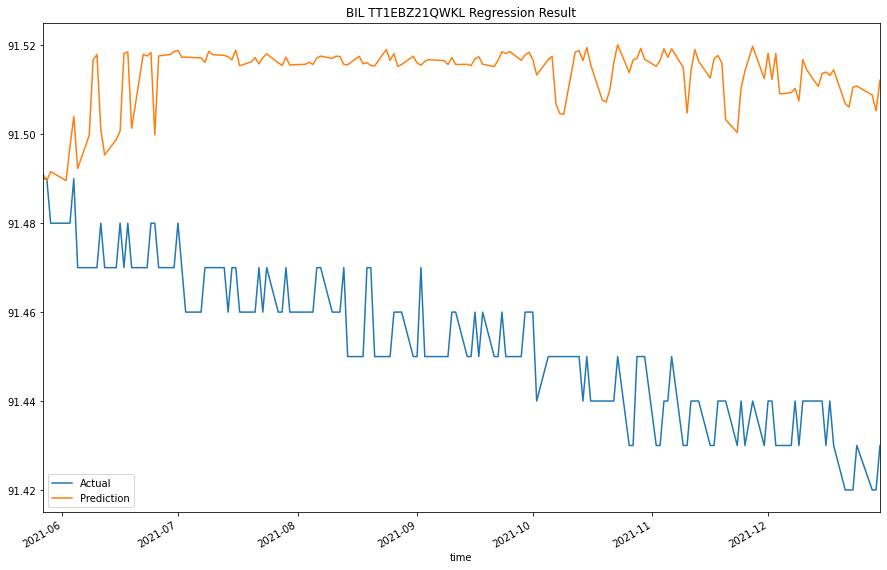

<Figure size 432x288 with 0 Axes>

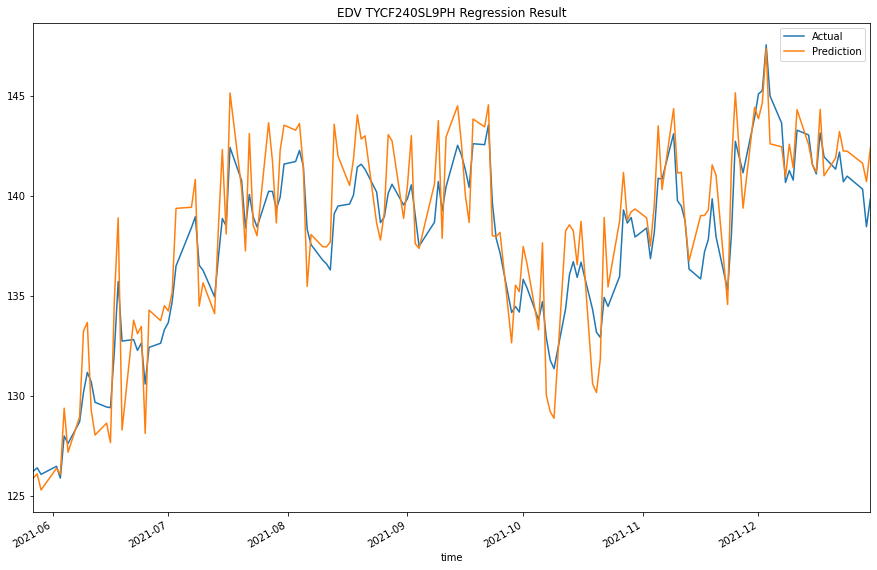

<Figure size 432x288 with 0 Axes>

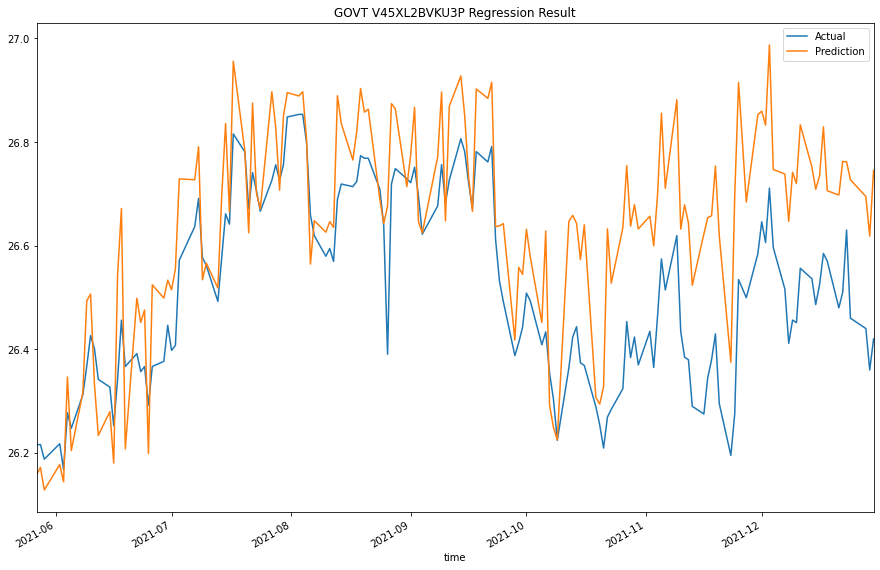

<Figure size 432x288 with 0 Axes>

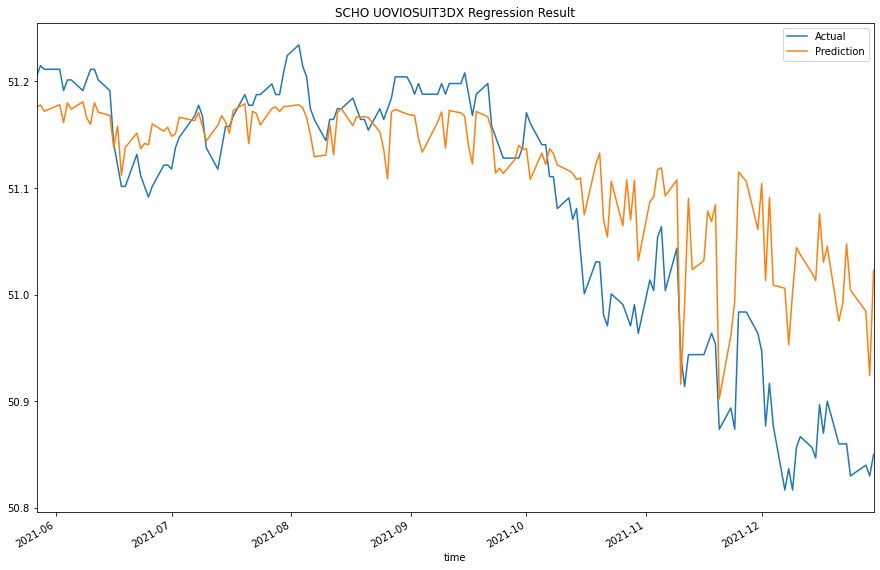

<Figure size 432x288 with 0 Axes>

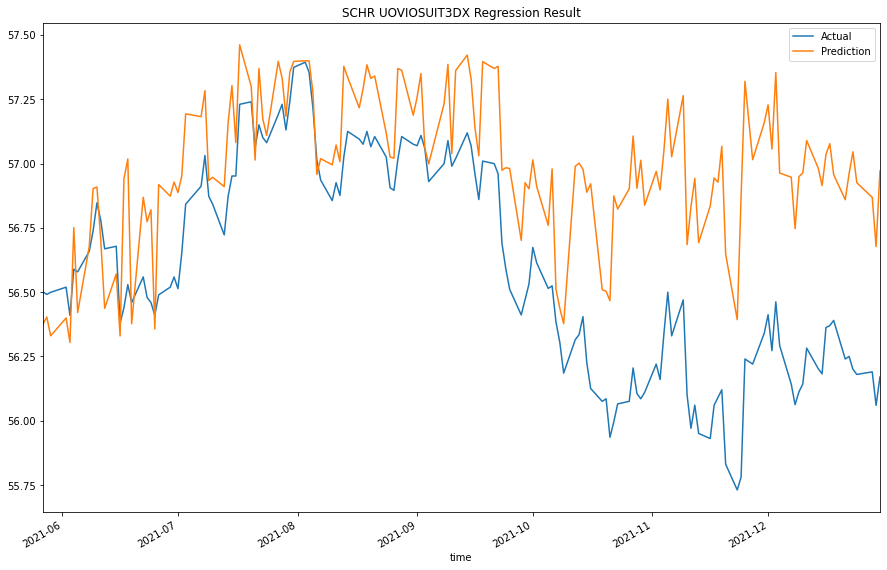

<Figure size 432x288 with 0 Axes>

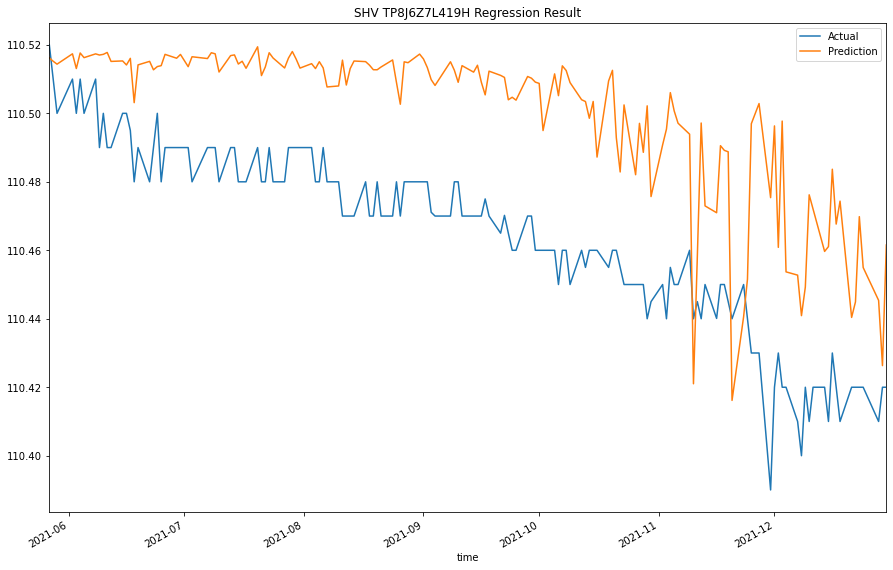

<Figure size 432x288 with 0 Axes>

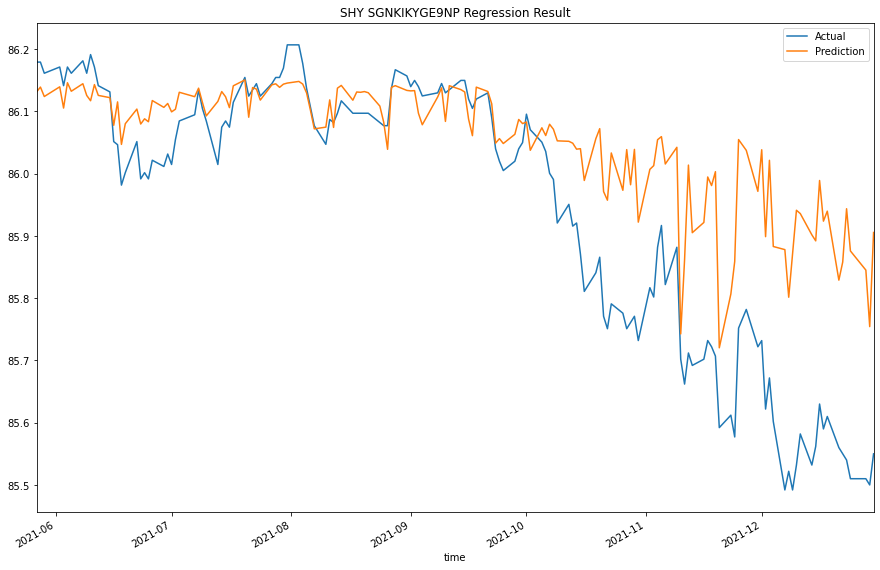

<Figure size 432x288 with 0 Axes>

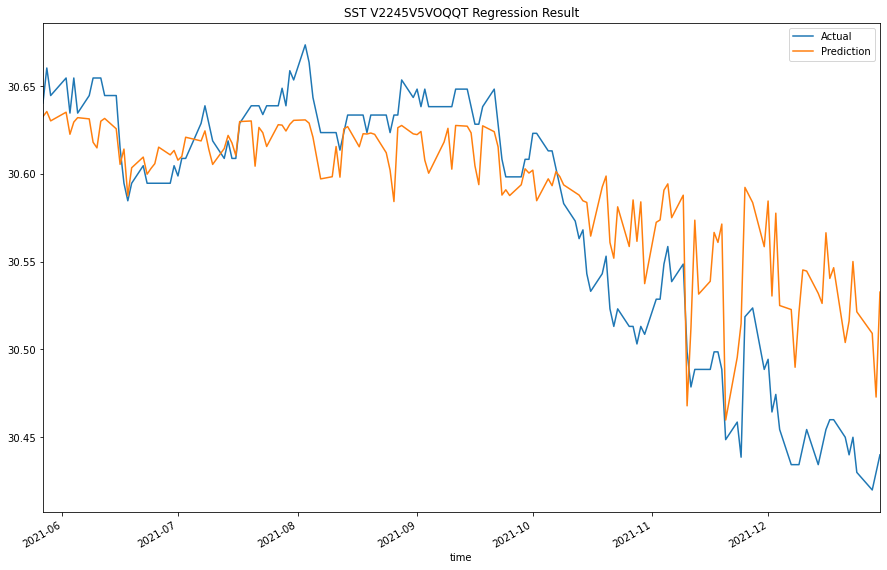

<Figure size 432x288 with 0 Axes>

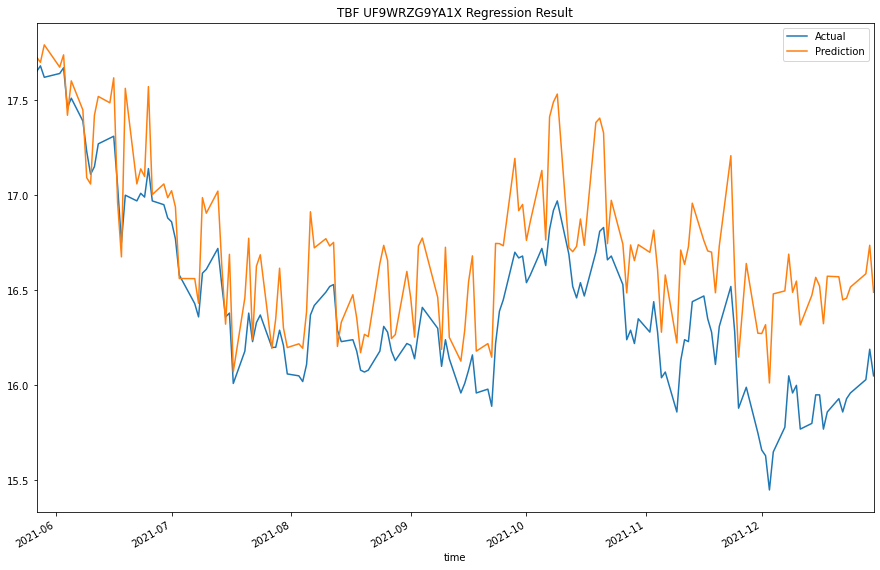

<Figure size 432x288 with 0 Axes>

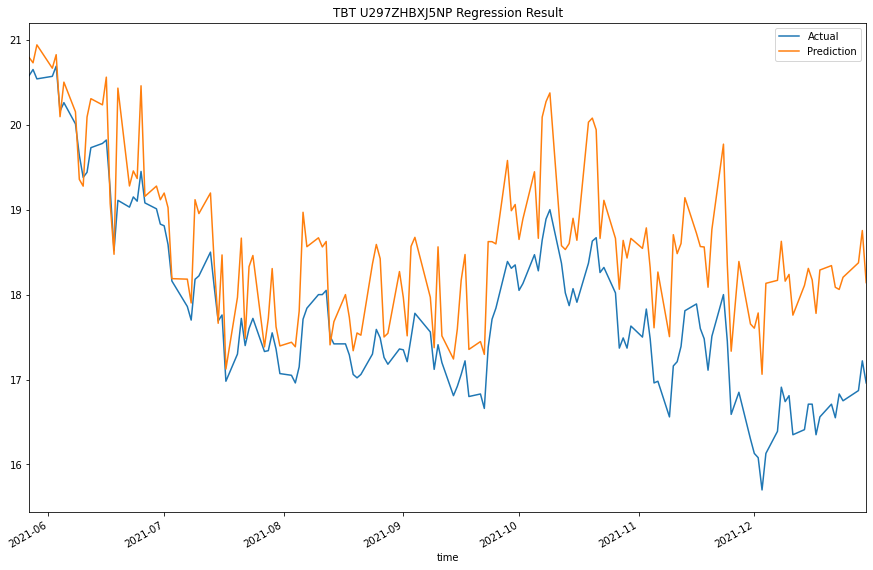

<Figure size 432x288 with 0 Axes>

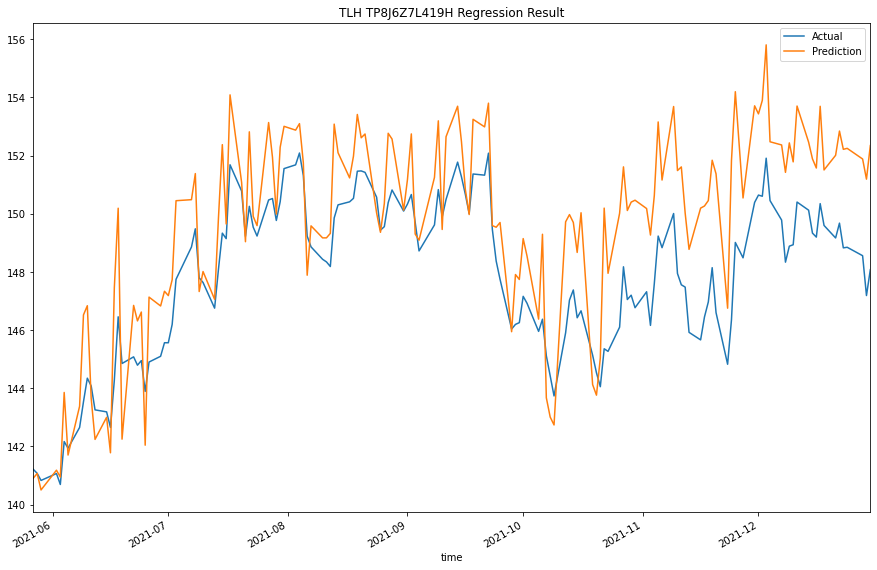

<Figure size 432x288 with 0 Axes>

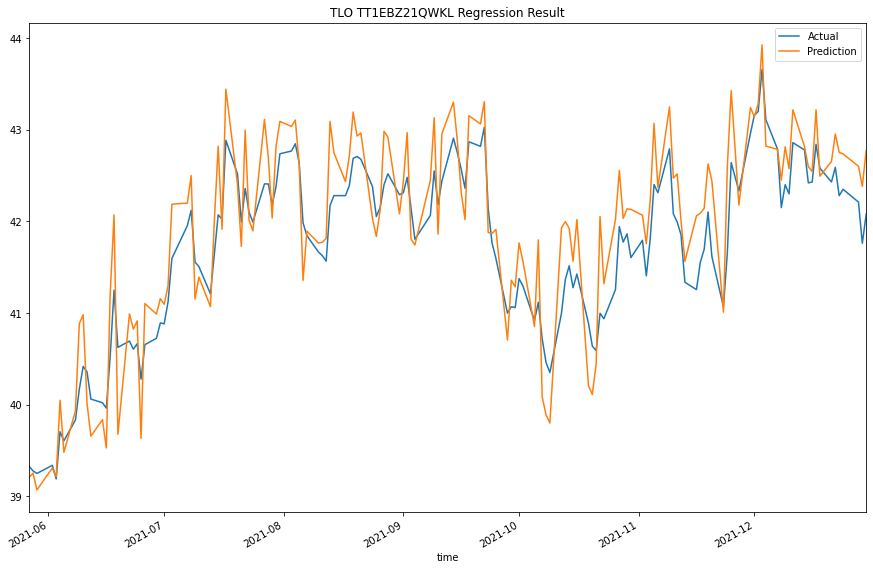

<Figure size 432x288 with 0 Axes>

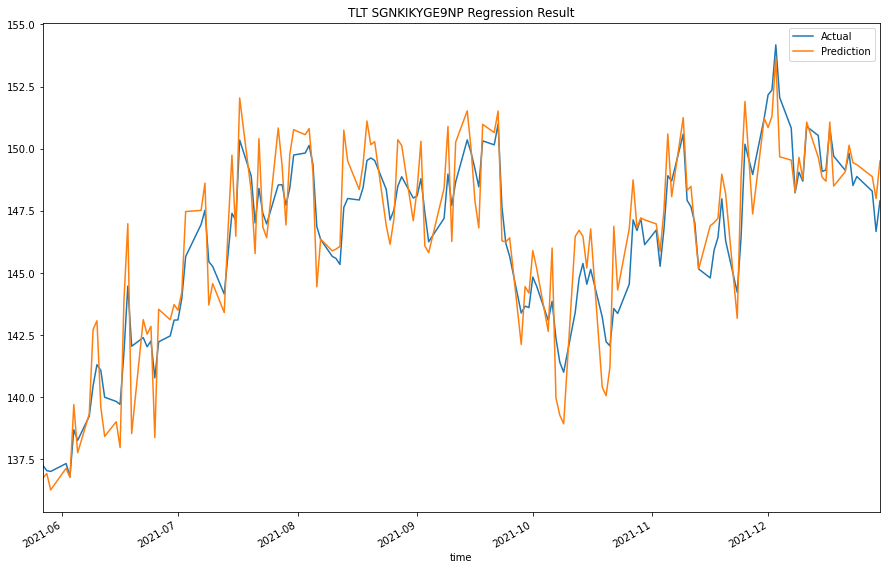

<Figure size 432x288 with 0 Axes>

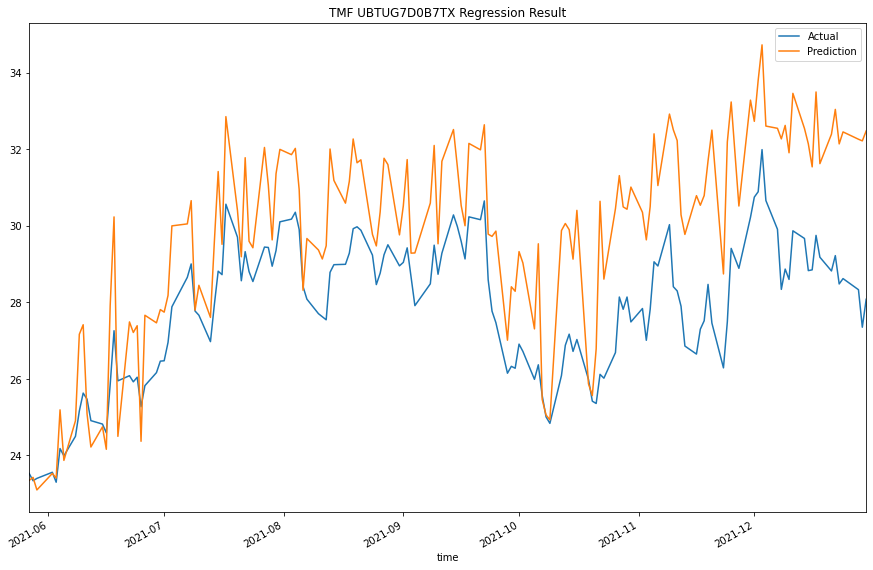

<Figure size 432x288 with 0 Axes>

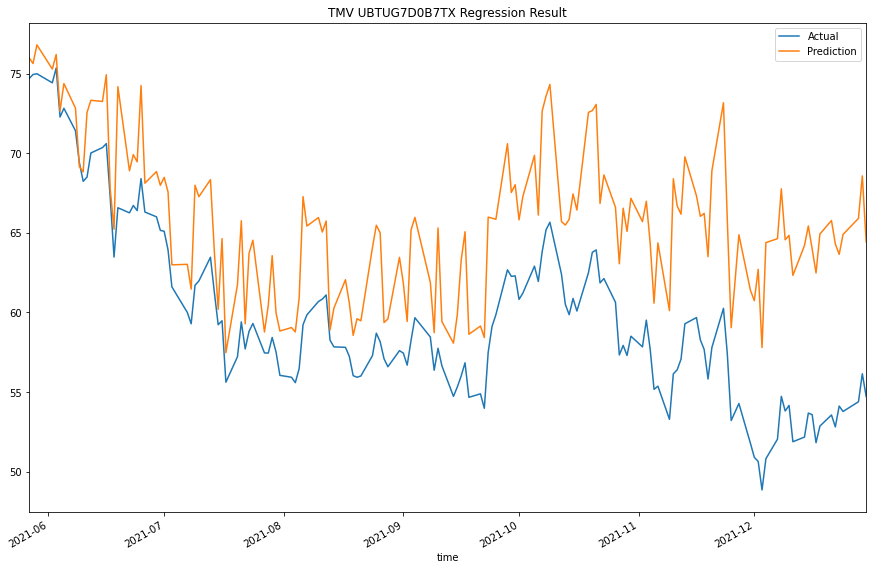

<Figure size 432x288 with 0 Axes>

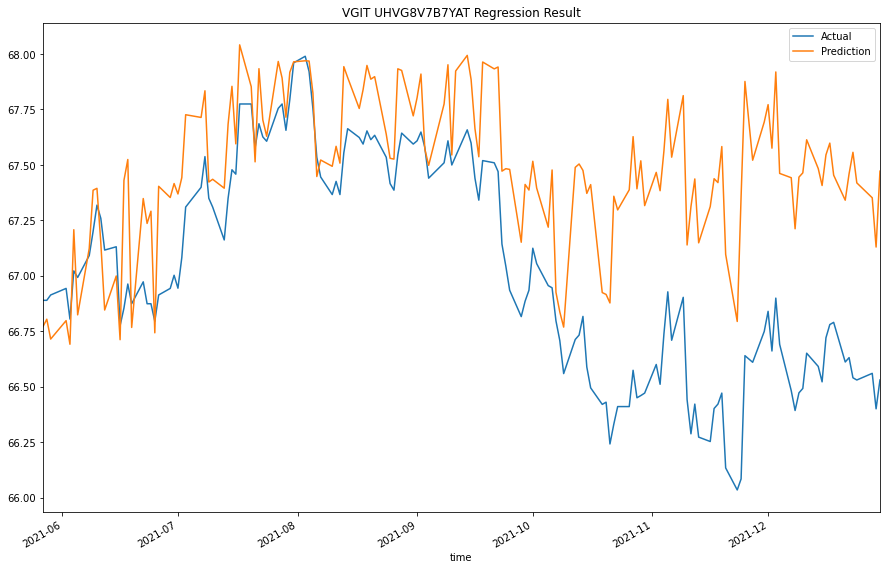

<Figure size 432x288 with 0 Axes>

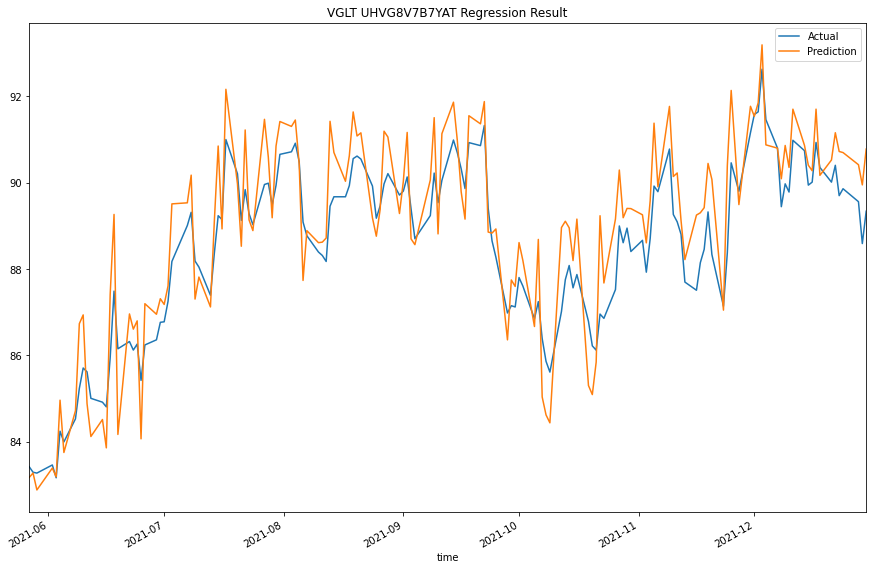

<Figure size 432x288 with 0 Axes>

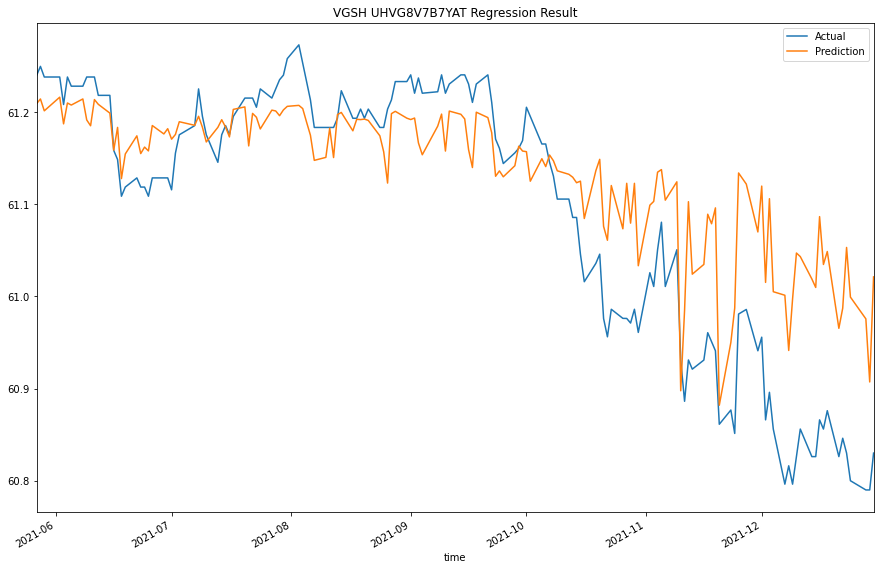

<Figure size 432x288 with 0 Axes>

In [8]:
# Predict the testing set
predictions = regressor.predict(X_test)

# Convert result into DataFrame
predictions = pd.DataFrame(predictions, index=y_test.index, columns=y_test.columns)
    
# Plot the result for comparison
for col in y_test.columns:
    plt.figure(figsize=(15, 10))

    y_test[col].plot(label="Actual")
    predictions[col].plot(label="Prediction")

    plt.title(f"{col} Regression Result")
    plt.legend()
    plt.show()
    plt.clf()